<h1 style="font-size:70px; background-color:#6a5acd; border:2px solid DodgerBlue; color:blue">Movie Genre Classification</h1>



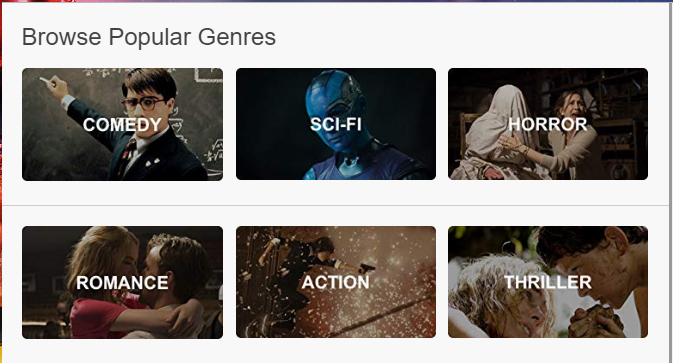

# Importing Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
#nltk.download()

In [49]:
import warnings
warnings.filterwarnings('ignore')

# **Loading Data**

In [3]:
train_file_path ='train.txt'
test_file_path='test.txt'
train = pd.read_csv(train_file_path,  delimiter='\t')
train

,"1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue."
0,2 ::: Cupid (1997) ::: thriller ::: A brother ...
1,"3 ::: Young, Wild and Wonderful (1980) ::: adu..."
2,4 ::: The Secret Sin (1915) ::: drama ::: To h...
3,5 ::: The Unrecovered (2007) ::: drama ::: The...
4,6 ::: Quality Control (2011) ::: documentary :...
...,...
54208,"54210 ::: ""Bonino"" (1953) ::: comedy ::: This ..."
54209,54211 ::: Dead Girls Don't Cry (????) ::: horr...
54210,54212 ::: Ronald Goedemondt: Ze bestaan echt (...
54211,54213 ::: Make Your Own Bed (1944) ::: comedy ...


## **Loading Again\***

## Train Data :

In [4]:
columns = [ 'Title', 'Genre','Description']
train = pd.read_csv(train_file_path, sep=':::', names=columns, engine='python')
train.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


## **Test data :**

In [5]:
test_columns = ['Title', 'Description']
test = pd.read_csv(test_file_path, sep=':::', names=test_columns, engine='python')
test.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


## **Checking Missing Values**

In [8]:
print("==="*15)
print('missing value percentage in train data : ')
print("==="*15)
print(train.isnull().sum()*100/len(train))
print("==="*15)
print('missing value percentage in test data :')
print("==="*15)
print(test.isnull().sum()*100/len(test))

missing value percentage in train data : 
Title          0.0
Genre          0.0
Description    0.0
dtype: float64
missing value percentage in test data :
Title          0.0
Description    0.0
dtype: float64


In [9]:
train = train.sample(25000)

## **Exploratory Data Analysis**

In [10]:
train.nunique()

Title          25000
Genre             27
Description    24959
dtype: int64

In [11]:
test.nunique()

Title          54200
Description    54072
dtype: int64

In [12]:
unique_Genre =train.Genre.unique().tolist()
unique_Genre

[' drama ',
 ' thriller ',
 ' comedy ',
 ' documentary ',
 ' reality-tv ',
 ' family ',
 ' short ',
 ' sci-fi ',
 ' adventure ',
 ' horror ',
 ' animation ',
 ' adult ',
 ' music ',
 ' western ',
 ' sport ',
 ' mystery ',
 ' war ',
 ' news ',
 ' action ',
 ' crime ',
 ' romance ',
 ' history ',
 ' biography ',
 ' musical ',
 ' fantasy ',
 ' talk-show ',
 ' game-show ']

In [13]:
print(f'Total number of unique Genre : {len(unique_Genre)}')

Total number of unique Genre : 27


In [14]:
Genre_count =train.Genre.value_counts()
print(Genre_count)

Genre
 drama           6316
 documentary     5996
 comedy          3391
 short           2352
 horror          1015
 thriller         723
 action           635
 western          498
 reality-tv       406
 adventure        353
 family           344
 music            338
 sci-fi           314
 romance          298
 adult            291
 crime            245
 animation        230
 sport            184
 talk-show        175
 mystery          152
 fantasy          145
 musical          129
 history          114
 biography        111
 game-show         96
 news              85
 war               64
Name: count, dtype: int64


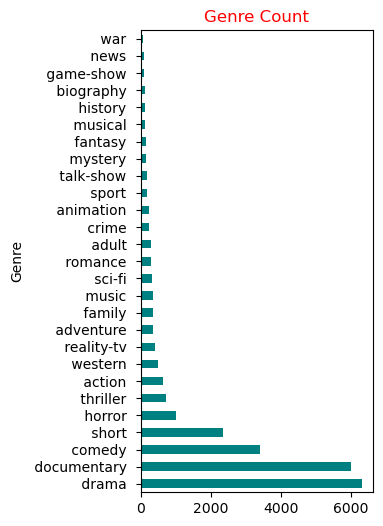

In [15]:
Genre_count.plot(kind= 'barh', figsize=(3,6), color = 'teal')
plt.title('Genre Count', color ='red')
plt.show()

In [16]:
# Choosing only Darama
train['Genre'] = train['Genre'].str.strip()
drama = train[train['Genre'] == 'drama'].reset_index(drop=True)
drama.head(10)

,Title,Genre,Description
0,The Neon Bible (1995),drama,"While on a train, a teenage boy thinks about ..."
1,Jump (2012/I),drama,A romantic drama set in a stunning village in...
2,"""Böyle mi olacakti"" (1997)",drama,The life story of three faithful schoolmates:...
3,A Clown in Babylon (1999),drama,Haunted by childhood memories of his father's...
4,Odete (2005),drama,Pedro and Rui kiss after a first-anniversary ...
5,Indiana (2019),drama,"Chris, a hardened auto-mechanic, hopes to ins..."
6,DRAMA Series Episode 3 (2013),drama,"The third episode in the DRAMA series, a show..."
7,Havoc (1925),drama,A war drama produced only 7 years after the e...
8,Tamanna (1998),drama,"The year is 1975, the place is Mahim, Bombay,..."
9,The Third Player (????),drama,"In a lot of Australian country towns, footbal..."


In [17]:
len(drama)

6316

In [18]:
drama.Description[1]

' A romantic drama set in a stunning village in Italian Switzerland. Alice is a beautiful and troubled twenty-something who is on the run from a life that is out of control. When her estranged father dies she returns to the village of her childhood to execute his will. Here she meets the grandmother she never knew, a man who may hold the key to her heart and a young epileptic boy. We watch to see if Alice can mend the damage inflicted by warring parents. Ultimately Jump is an uplifting story about the power of friendship and love.'

In [19]:
drama.Description[800]

" After a full life whose end he wants to determine himself, patriarch Holm Hardenberg invites his family and close associates to his picturesque country house on the Chiemsee lake in Bavaria in order to take his leave. Here, Hardenberg's daughters Marie and Charlotte, his ex-wife Ella and his best friends Adrian and Katharina meet. But the original idea of a harmonious concourse turns into a ruthless settling of scores."

In [20]:
!pip install langdetect -q

# **Language Detection**

In [20]:
from tqdm import tqdm
from langdetect import detect
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'
    
# Applying on train data
tqdm.pandas(desc="Detecting language for train data")
train['Language'] = train['Description'].progress_apply(lambda x: detect_language(x))

Detecting language for train data: 100%|████████████████████████████████████████| 25000/25000 [02:28<00:00, 168.36it/s]


In [22]:
tqdm.pandas(desc="Detecting language for test data")
test['Language'] = test['Description'].progress_apply(lambda x: detect_language(x))

Detecting language for test data: 100%|█████████████████████████████████████████| 54200/54200 [05:38<00:00, 160.30it/s]


In [23]:
train

,Title,Genre,Description,Language
52578,"""Lourd"" (2016)",comedy,Lourd est une comédie qui présente les facett...,fr
50004,The Flute (2012),short,Erwin travels through a post-apocalyptic wast...,en
4523,Christmas at Maxwell's (2006),drama,This Christmas will change the Austin family ...,en
42183,Be Be Be (2016),short,Gibran is a singer and a musician. He develop...,en
50887,Freedom Deep (1998),fantasy,"Abandoned at six by his off-kilter parents, L...",en
...,...,...,...,...
14094,Piuma (2016),drama,"Piuma is the story of Ferro and Cate, your av...",en
32883,Roshambo (2015),comedy,Roshambo follows a three man film crew on the...,en
43537,The Arcadians (1927),comedy,A nightclub owner who suspects that the polic...,en
29600,"""Pini"" (2010)",comedy,Olive tries to get Pini to go on a date with ...,en


In [24]:
total_lan_train = train.Language.unique()
print(f'Total language detected in train data : {len(total_lan_train)}')
print(total_lan_train)
print('==========='*6)
total_lan_test = test.Language.unique()
print(f'Total language detected  in test data: {len(total_lan_test)}')
print(total_lan_test)

Total language detected in train data : 10
['fr' 'en' 'hu' 'de' 'it' 'es' 'nl' 'no' 'sl' 'vi']
Total language detected  in test data: 11
['en' 'hu' 'fr' 'it' 'no' 'de' 'es' 'pt' 'ro' 'pl' 'ca']


In [25]:
common_languages = set(total_lan_train) & set(total_lan_test)
print(f"Common languages: {common_languages}")

Common languages: {'de', 'hu', 'it', 'fr', 'es', 'no', 'en'}


In [26]:
unique_to_train = set(total_lan_train) - set(total_lan_test)
unique_to_test = set(total_lan_test) - set(total_lan_train)

print(f"Languages unique to train data: {unique_to_train}")
print(f"Languages unique to test data: {unique_to_test}")

Languages unique to train data: {'vi', 'sl', 'nl'}
Languages unique to test data: {'ro', 'ca', 'pt', 'pl'}


In [27]:
language_count_train = train.Language.value_counts()
language_count_train

Language
en    24838
fr       74
it       48
hu       13
no        9
es        8
de        7
nl        1
sl        1
vi        1
Name: count, dtype: int64

In [28]:
language_count_test = test.Language.value_counts()
language_count_test

Language
en    53813
fr      143
it      109
hu       54
es       47
de       19
no       11
pt        1
ro        1
pl        1
ca        1
Name: count, dtype: int64

In [29]:
concatenated_series = pd.concat([language_count_train, language_count_test], axis=1)

concatenated_series.columns =['count_train','count_test']
concatenated_series

,count_train,count_test
Language,,
en,24838.0,53813.0
fr,74.0,143.0
it,48.0,109.0
hu,13.0,54.0
no,9.0,11.0
es,8.0,47.0
de,7.0,19.0
nl,1.0,NaN
sl,1.0,NaN


<Axes: ylabel='Language'>

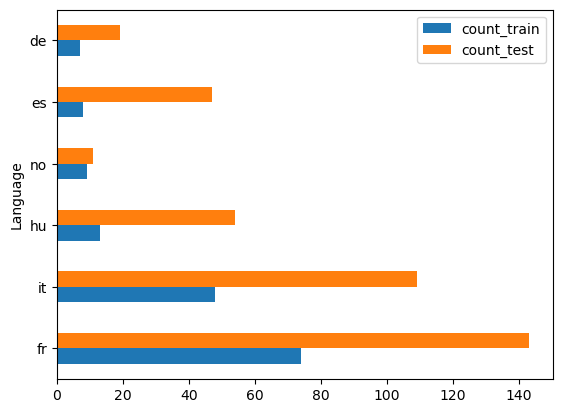

In [30]:
concatenated_series.dropna()[1:].plot(kind='barh')  # language count except english

In [21]:
non_english_train = train[train['Language'] != 'en'].reset_index(drop=True)
#non_english_test =test[test['Language']!='en'].reset_index(drop=True)
non_english_train.head()

,Title,Genre,Description,Language
0,Novios 68 (1967),comedy,Emilio es un gigolo que mantiene a escondidas...,es
1,La vendetta di Spartacus (1964),adventure,Arminio e Trasone fanno credere che il leggen...,it
2,"""Temps dur"" (2004)",drama,L'histoire du voyage semé d'obstacles du déte...,fr
3,Mamma sconosciuta (1956),drama,Mara si sposa in Argentina con il famoso cant...,it
4,Kurtalábú pásztor (1970),adventure,Mail <svaradi@sprynet.com> for translation. P...,hu


In [22]:
non_english_train['Description'].loc[10]

' Mail <svaradi@sprynet.com> for translation. A film az 1948-49-es magyar szabadságharc katonáinak sorsát követi az emigrációban. A hontalanság, a vesztett ügy tovább- élésének kérdéseire keres választ. Az archaizáló képek idézete úgy hat, mintha a filmet múlt századi, kallódó fel- vételekböl állították volna össze.'

In [23]:
Lang_Genre_result = non_english_train.groupby(['Language','Genre'])[['Title']].count()
Lang_Genre_result

Title
Language Genre             
de       comedy           1
         documentary      1
         drama            3
         fantasy          1
         short            1
         thriller         1
es       comedy           6
         drama            4
         fantasy          1
         romance          1
         short            8
fr       biography        1
         comedy          19
         crime            1
         documentary     12
         drama           25
         family           4
         reality-tv       1
         sci-fi           1
         short            5
         talk-show        3
         thriller         1
hu       adventure        1
         comedy           3
         documentary      3
         drama           11
it       adventure        1
         biography        1
         comedy          30
         drama           12
         musical          3
         thriller         2
nl       comedy           1
no       comedy           2
         drama            6
sq       comedy           1

<Axes: xlabel='Language,Genre'>

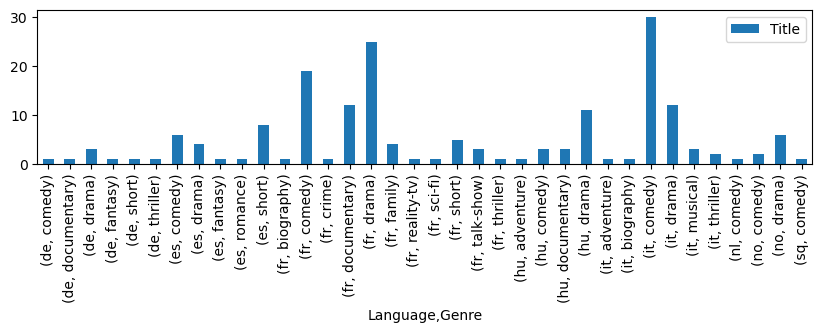

In [24]:
Lang_Genre_result.plot(kind='bar',figsize=(10,2))

# Translation of detected language to English

In [ ]:
#!pip install -U textblob -q

In [ ]:
#!python -m textblob.download_corpora

In [33]:
# for lang in non_english_train.Language:
#     if lang!='en':
#         for row in non_english_train.Description:
#             blob = TextBlob(row)
#             text = blob.translate(from_lang= lang, to='en')
#             print (text)     

In [25]:
from textblob import TextBlob
from textblob.exceptions import NotTranslated
from tqdm import tqdm

def translate_to_english(description, language):
    try:
        blob = TextBlob(description)
        translated_text = str(blob.translate(from_lang=language, to='en'))
        return translated_text
    except NotTranslated:
        # Handle the case where translation is not possible
        return "Translation not available"

def translate_descriptions(df):
    translations = []

    for index, row in tqdm(df.iterrows(), total=len(df), desc="Translating Descriptions"):
        if row['Language'] != 'en':
            translated_description = translate_to_english(row['Description'], row['Language'])
            translations.append(translated_description)
        else:
            # If the language is already English, keep the original description
            translations.append(row['Description'])

    df['Translated_Description'] = translations
    return df

In [26]:
train = translate_descriptions(train)
train[train.Language !='en']

Translating Descriptions: 100%|█████████████████████████████████████████████████| 25000/25000 [02:47<00:00, 149.16it/s]


,Title,Genre,Description,Language,Translated_Description
12270,Novios 68 (1967),comedy,Emilio es un gigolo que mantiene a escondidas...,es,Emilio is a gigolo who keeps hidden relationsh...
17721,La vendetta di Spartacus (1964),adventure,Arminio e Trasone fanno credere che il leggen...,it,Arminio and Trasone make believe that the lege...
13324,"""Temps dur"" (2004)",drama,L'histoire du voyage semé d'obstacles du déte...,fr,The history of the travele sown of obstacles o...
37685,Mamma sconosciuta (1956),drama,Mara si sposa in Argentina con il famoso cant...,it,Mara marries Argentina with the famous singer ...
13703,Kurtalábú pásztor (1970),adventure,Mail <svaradi@sprynet.com> for translation. P...,hu,Mail <svaradi@sprynet.com> for translation. Ru...
...,...,...,...,...,...
43164,"""Méchant changement"" (2005)",reality-tv,Émission de télévision québécoise pour les je...,fr,Quebec television program for young people bro...
53570,"Et au pire, on se mariera (2017)",drama,Aďcha est une adolescente de 14 ans qui a une...,fr,Aďcha is a 14-year-old teenager who has a tens...
4873,Arven (1979),drama,I et blomstersmykket kapell er en sřrgerskare...,no,"In a flower jewelery chapel, a sunbeam is asse..."
12829,Napoli d'altri tempi (1938),musical,"Mario Esposito, giovane commesso in un negozi...",it,"Mario Esposito, a young man committed in a har..."


In [ ]:
# translated = []
# for lang in tqdm(non_english_test.Language, desc="Translating"):
#      if lang!='en':
#         for row in non_english_train.Description:
#             try:
#                 blob = TextBlob(row)
#                 text = blob.translate(from_lang= lang, to='en')
#                 translated.append(text)
#             except NotTranslated:      # Handle the case where translation is not possible
#                 #print("Translation not available")
#                 translated.append("Translation not available")
# test['Translated_Description'] = translated


In [27]:
train[train.Language != 'en']['Description'].loc[12270]

' Emilio es un gigolo que mantiene a escondidas relaciones con 3 novias a la vez: Gela, Teresa, farmacéutica, y Susana, azafata de vuelo. Marcelino es percusionista en una orquesta y novio de Conchita, la cual trabaja en una floristería. Julia es oficinista y novia de Antonio, un holgazán sin oficio ni beneficio. Pepe es fontanero y novio de la hermana de Gela. Federico es fabricante de persianas. Atropella accidentalmente a Julia, de tal forma que terminan enamorándose. Lucía es sirvienta y novia de Saturnino, un peón de obras que acaba de terminar el servicio militar. Se narran en tono de comedia las vicisitudes acontecidas en los noviazgos de estas personas en la Espańa de 1968.'

In [28]:
train[train.Language != 'en']['Translated_Description'].loc[12270]

"Emilio is a gigolo who keeps hidden relationships with 3 brides at the same time: Gela, Teresa, Pharmaceutical, and Susana, flight hostess. Marcelino is a percussionist in a Conchita orchestra and boyfriend, who works in a florist. Julia is an office and girlfriend of Antonio, a lazy no trade or benefit. Pepe is a plumber and boyfriend of Gela's sister. Federico is a blind manufacturer. Julia accidentally run over, so that they end up falling in love. Lucia is Saturnino's servant and girlfriend, a pawn of works that has just finished military service. The vicissitudes occurred in the courtships of these people in the Spanish of 1968 are narrated in comedy tone."

# Cleaning Text

In [38]:
email = train.loc[train['Translated_Description'].str.contains(r'@\S+')][['Translated_Description']]
email.head()

,Translated_Description
20341,Mail <svaradi@sprynet.com> for translation. Th...
46755,Team TVG reflects on the moments that defined...
26758,Metal Central is a TV show featuring the best...
44869,Mail <svaradi@sprynet.com> for translation. Th...
243,Mail <svaradi@sprynet.com> for translation. Ti...


In [39]:
http = train.loc[train['Translated_Description'].str.contains(r'http\S+')]['Translated_Description']
http.iloc[1]

' A feminist sex movie??? http:hollywoodlovemovie.wordpress.com is a movie farce about modern love in show biz HOLLYWOOD LOVE is a comedy of dominance and submission, and the duet dance of perpetrator and victim that usually makes both partners losers, sometimes winners, always ridiculous. The sex scenes are athletic and loud, as in real life -- and pointedly in contrast to the soft-focus, lyrical artificial look of most movie love scenes. Adult but not pornographic, not suitable for children, but a great starting point for discussion in a romance. This is shocking comedy about socially relevant issues to stimulate audiences, comedy that is physical without becoming fstupid, farce that is ribald without becoming pornographic. HOLLYWOOD LOVE presents a hyper modern version of the battles of sex and the sexes, influenced by feminism and the sexual revolution and gender-bending. In the story, an innocent young man from the hills brings his guitar to Hollywood, hoping to break into show bu

# **Preprocessing of text in train_data**

In [29]:
import string
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
word_punct = nltk.tokenize.WordPunctTokenizer()
word_lemmatize = WordNetLemmatizer() 
white_token = nltk.tokenize.WhitespaceTokenizer()

# def clean_text(text):
#     if isinstance(text, str):
#         text = text.lower()                                  # lower-case all characters
#         text =  re.sub(r'@\S+', '',text)                     # remove email or @ handles
#         text =  re.sub(r'http\S+', '',text)                  # remove http
#         text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
#         text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
#         #text = "".join([i for i in text if i not in string.punctuation])
#         text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
#         #text = word_punct.tokenize(text)
#         #text = nltk.tokenize.word_tokenize(text)
#         text = nltk.tokenize.word_tokenize(text, language='english', preserve_line=True)
#         text = re.sub("\s[\s]+", " ", text).strip()    # remove repeated extra spaces
#         whitespace = white_token.tokenize(text)
#         stemmed_words = [word_lemmatize.lemmatize(word) for word in whitespace]
#         processed_text = ' '.join(stemmed_words)
#         return processed_text
#     else:
#         return ""

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"[^a-zA-Z+']", ' ', text)
        text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')
        text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
        text = nltk.tokenize.word_tokenize(text, language='english', preserve_line=True)
        text = ' '.join(text)
        text = re.sub("\s[\s]+", " ", text).strip()
        whitespace = white_token.tokenize(text)
        stemmed_words = [word_lemmatize.lemmatize(word) for word in whitespace]
        processed_text = ' '.join(stemmed_words)
        return processed_text
    else:
        return ""



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
train['cleaned_Description'] = train['Translated_Description'].apply(clean_text)
train['length_old'] = train['Translated_Description'].apply(len)
train['length_new'] = train['cleaned_Description'].apply(len)

# 50 most frequent words

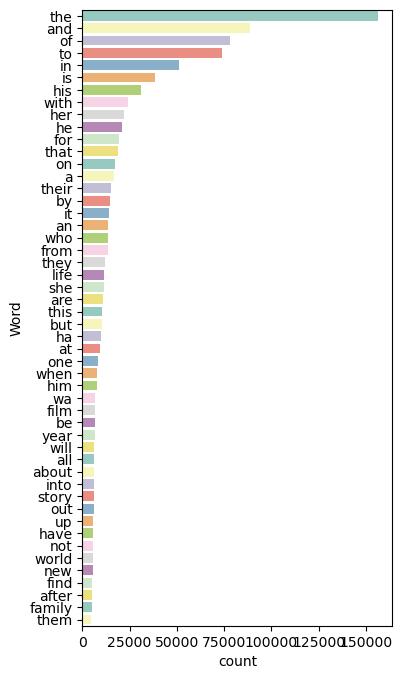

In [42]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  freq_dist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
  dist_words = words_df.nlargest(columns="count", n = terms)

  # Visualising
  plt.figure(figsize=(4,8))
  ax = sns.barplot(data=dist_words,
                   x= "count",
                   y = "word",
                   orientation='horizontal',
                   palette='Set3')
  #ax = dist_words.plot(kind='barh')
  ax.set(ylabel = 'Word')
  plt.show()

# print 50 most frequent words
freq_words(train['cleaned_Description'], 50)

In [43]:
train

,Title,Genre,Description,Language,Translated_Description,cleaned_Description,length_old,length_new
52578,"""Lourd"" (2016)",comedy,Lourd est une comédie qui présente les facett...,fr,Heavy is a comedy that presents the facets of ...,heavy is comedy that present the facet of the ...,447,412
50004,The Flute (2012),short,Erwin travels through a post-apocalyptic wast...,en,Erwin travels through a post-apocalyptic wast...,erwin travel through post apocalyptic wastelan...,292,271
4523,Christmas at Maxwell's (2006),drama,This Christmas will change the Austin family ...,en,This Christmas will change the Austin family ...,this christmas will change the austin family f...,781,743
42183,Be Be Be (2016),short,Gibran is a singer and a musician. He develop...,en,Gibran is a singer and a musician. He develop...,gibran is singer and musician he develops stut...,271,256
50887,Freedom Deep (1998),fantasy,"Abandoned at six by his off-kilter parents, L...",en,"Abandoned at six by his off-kilter parents, L...",abandoned at six by his off kilter parent liam...,378,345
...,...,...,...,...,...,...,...,...
14094,Piuma (2016),drama,"Piuma is the story of Ferro and Cate, your av...",en,"Piuma is the story of Ferro and Cate, your av...",piuma is the story of ferro and cate your aver...,305,291
32883,Roshambo (2015),comedy,Roshambo follows a three man film crew on the...,en,Roshambo follows a three man film crew on the...,roshambo follows three man film crew on their ...,269,258
43537,The Arcadians (1927),comedy,A nightclub owner who suspects that the polic...,en,A nightclub owner who suspects that the polic...,nightclub owner who suspect that the police ar...,253,243
29600,"""Pini"" (2010)",comedy,Olive tries to get Pini to go on a date with ...,en,Olive tries to get Pini to go on a date with ...,olive try to get pini to go on date with him b...,285,266


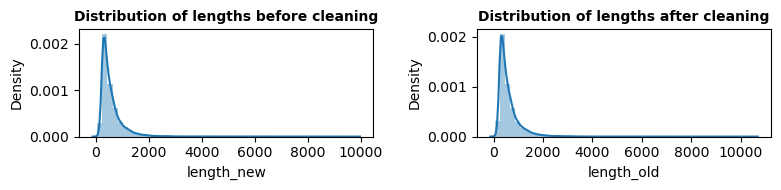

In [44]:
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
sns.distplot(train['length_new'])
plt.title('Distribution of lengths before cleaning',fontweight='bold',fontsize=10)
plt.subplot(1,2,2)
sns.distplot(train['length_old'])
plt.title('Distribution of lengths after cleaning',fontweight='bold',fontsize=10)
plt.tight_layout()
plt.show()

# Genre Categories

In [31]:
fiction = ['drama',  'thriller', 'adult',  'comedy', 'crime',
           'horror',  'animation', 'action', 'fantasy','sci-fi', 
           'adventure', 'western', 'family', 'romance','musical', 'war'] 

non_fiction = ['documentary','reality-tv', 'talk-show','news','biography']

mixed_genre =['short', 'sport', 'music', 'mystery', 'history','game-show']

all_genres = train.Genre.values
all_genres

array(['drama', 'thriller', 'comedy', ..., 'drama', 'drama', 'comedy'],
      dtype=object)

In [32]:
genre_to_category = {}

for genre in fiction:
    genre_to_category[genre] = 'Fiction'

for genre in non_fiction:
    genre_to_category[genre] = 'Non-Fiction'

for genre in mixed_genre:
    genre_to_category[genre] = 'Mixed Genre'

# Replace genre names with category names
train['New_Genre'] = train['Genre'].map(genre_to_category)
     

In [33]:
nan_rows = train[train['New_Genre'].isnull()][['Genre', 'New_Genre']]
nan_rows

,Genre,New_Genre


In [48]:
non_english_train = train[train['Language'] != 'en']
Lang_Genre_result = non_english_train.groupby(['New_Genre','Language'])[['Title']].count()
Lang_Genre_result

Title
New_Genre   Language       
Fiction     de            4
            es            4
            fr           48
            hu           11
            it           47
            nl            1
            no            8
            vi            1
Mixed Genre de            2
            es            3
            fr            7
Non-Fiction de            1
            es            1
            fr           19
            hu            2
            it            1
            no            1
            sl            1

<Axes: xlabel='New_Genre,Language'>

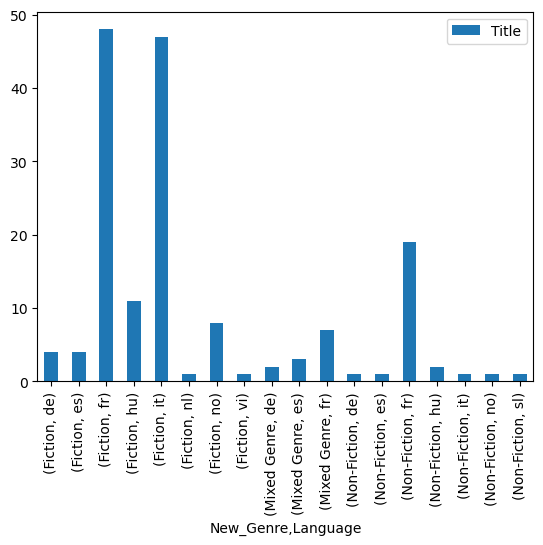

In [49]:
Lang_Genre_result.plot(kind='bar')

<Axes: xlabel='New_Genre'>

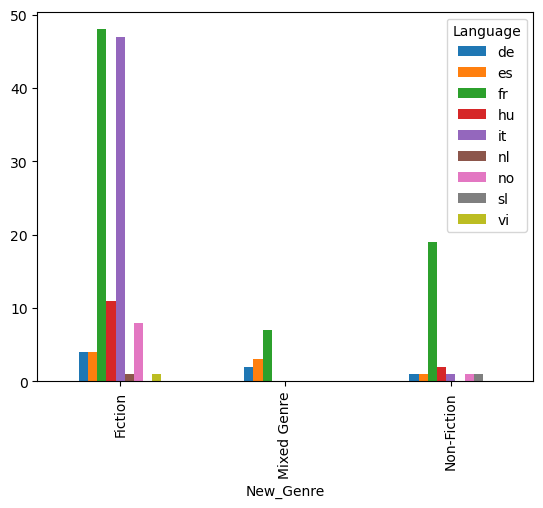

In [50]:
cross_tab = pd.crosstab(index=non_english_train['New_Genre'],
                        columns=non_english_train['Language'],
                        values=non_english_train['Title'], aggfunc='count')
cross_tab.plot(kind='bar')

In [34]:
x = train.cleaned_Description
y = train.New_Genre
y_old = train.Genre

In [52]:
train.New_Genre.unique()

array(['Fiction', 'Mixed Genre', 'Non-Fiction'], dtype=object)

In [53]:
print(y.value_counts())

New_Genre
Fiction        14897
Non-Fiction     6848
Mixed Genre     3255
Name: count, dtype: int64


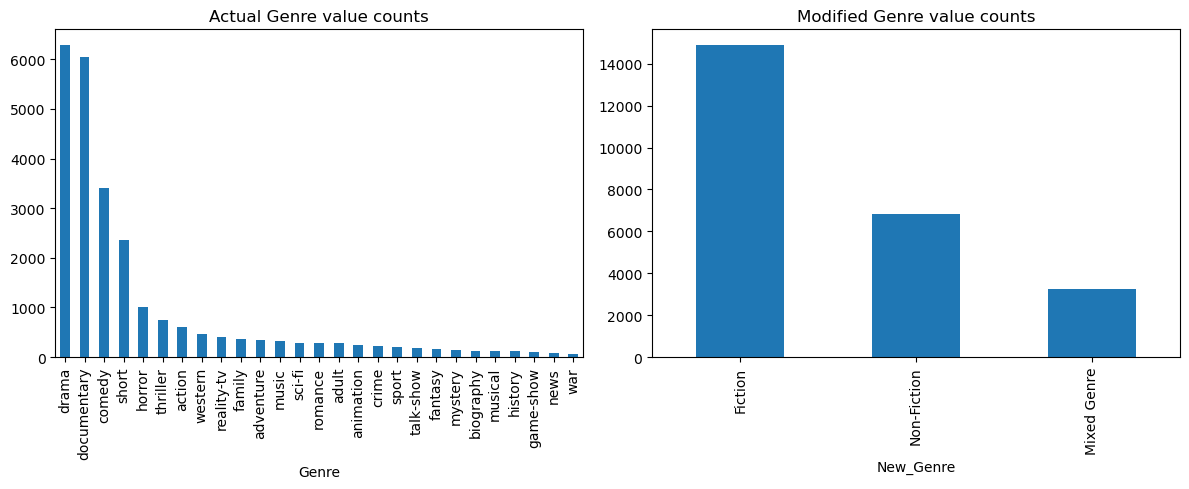

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

y_old.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Actual Genre value counts')

y.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Modified Genre value counts')

plt.tight_layout()
plt.show()

## Encoding target variable

In [55]:
# from sklearn.preprocessing import LabelEncoder

# le_new = LabelEncoder()
# y_new = le_new.fit_transform(y)

# le_old = LabelEncoder()
# y_old = le_old.fit_transform(y_old)

# y= pd.DataFrame(y_new)
# y_old= pd.DataFrame(y_old)

# print(y.value_counts())
# print(y_old.value_counts())

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state= 121, stratify= y)
xx_train, xx_test, yy_train, yy_test = train_test_split(x,y_old, test_size = 0.2, random_state= 121, stratify= y_old)

In [36]:
x_train_df = pd.DataFrame(x_train)
x_train_df.columns=['cleaned_Description']
x_train_df

,cleaned_Description
33959,no equal the trial of america female soldier i...
46028,comedy about dominican who come to new york un...
17613,david miller is an idealist in the colonial fr...
40997,after one unassuming chinese language teacher ...
31875,country bumpkin aaron slick ha been unsuccessf...
...,...
37087,jay is high school student loner and misfit wh...
13014,two woman who are unrelated and have never met...
43502,all shy everyman barry wei want is to go to th...
47981,huge spaceship make it way to our world and se...


# Building Pipeline

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

from sklearn.metrics import *


# Text Tectorisation by TfidfVectorization

In [38]:

#Feature Extraction
vectorizer = TfidfVectorizer(lowercase=True, #Lowercase chars
                                   ngram_range=(1,3), #Capture unigrams, bigrams and trigrams
                                   stop_words='english',#Remove stop_words
                                   min_df=2)#Ignore words that appears less than 2 times

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

## Pipeline #1

## Modified Genre

### With balancing the target 

In [51]:
from sklearn.naive_bayes import MultinomialNB
classifier =MultinomialNB(alpha =0.1,)
pipeline_balance = make_pipeline(vectorizer, oversampler, classifier)

pipeline_balance.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [62]:
y_pred_train = pipeline_balance.predict(x_train)
y_pred_test = pipeline_balance.predict(x_test)

from sklearn.metrics import *
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.9691764705882353
Testing Accuracy : 0.7818666666666667


In [63]:
from sklearn.model_selection import cross_val_score
cv_train_acc =(cross_val_score(pipeline_balance, x_train, y_train, cv=5).mean()).round(2)*100
print('Training Accuracy with Cross Validation:', train_acc)

Training Accuracy with Cross Validation: 0.9691764705882353


### Without balancing the target 

In [52]:
classifier =MultinomialNB(alpha =0.3,)
pipeline = Pipeline([("vect", vectorizer),("clf", classifier)])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('clf', MultinomialNB(alpha=0.3))])

In [65]:

y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.8563764705882353
Testing Accuracy : 0.7530666666666667


In [66]:
from sklearn.model_selection import cross_val_score
cv_train_acc =(cross_val_score(pipeline, x_train, y_train, cv=5).mean()).round(2)*100
print('Training Accuracy with Cross Validation:', train_acc)

Training Accuracy with Cross Validation: 0.8563764705882353


## Original Genres

### With balancing the target

In [53]:
pipeline_balance.fit(xx_train,yy_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('multinomialnb', MultinomialNB(alpha=0.1))])

In [68]:
y_pred_train = pipeline_balance.predict(xx_train)
y_pred_test = pipeline_balance.predict(xx_test)

train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.976
Testing Accuracy : 0.557


### Without balancing the target

In [54]:
pipeline.fit(xx_train,yy_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('clf', MultinomialNB(alpha=0.3))])

In [70]:
y_pred_train = pipeline.predict(xx_train)
y_pred_test = pipeline.predict(xx_test)

train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.606
Testing Accuracy : 0.4626


## Pipeline #2

## Modified Genre

### With balancing the target

In [55]:
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression(penalty='l1', C=1.0, class_weight='balanced', solver = 'liblinear')
pipeline_log_balance = make_pipeline(vectorizer, oversampler, classifier)

pipeline_log_balance.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

In [72]:
y_pred_train = pipeline_log_balance.predict(x_train)
y_pred_test = pipeline_log_balance.predict(x_test)


train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.8411294117647059
Testing Accuracy : 0.7434666666666667


In [73]:
cv_train_acc =(cross_val_score(pipeline_log_balance, x_train, y_train, cv=5).mean()).round(2)*100
print('Training Accuracy with Cross Validation:', train_acc)

Training Accuracy with Cross Validation: 0.8411294117647059


### Without balancing the target

In [56]:
pipeline_log = Pipeline([("vect", vectorizer),("clf", classifier)])
pipeline_log.fit(x_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('clf',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

In [75]:
y_pred_train = pipeline_log.predict(x_train)
y_pred_test = pipeline_log.predict(x_test)


train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.8113411764705882
Testing Accuracy : 0.7712


## Original Genre

### With balancing the target

In [57]:
pipeline_log_balance.fit(xx_train,yy_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

In [81]:
y_pred_train = pipeline_log_balance.predict(xx_train)
y_pred_test = pipeline_log_balance.predict(xx_test)

from sklearn.metrics import *
train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.75875
Testing Accuracy : 0.4654


### Without balancing the target

In [58]:
pipeline_log.fit(xx_train,yy_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('clf',
                 LogisticRegression(class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])

In [78]:

y_pred_train = pipeline_log.predict(xx_train)
y_pred_test = pipeline_log.predict(xx_test)

from sklearn.metrics import *
train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.4912
Testing Accuracy : 0.3936


## Pipeline #3

## Modified Genre

### With balancing the target

In [50]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', gamma= 0.3 )

pipeline_svc_balance = make_pipeline(vectorizer, oversampler, classifier)

pipeline_svc_balance.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('svc', SVC(gamma=0.3, kernel='linear'))])

In [80]:
y_pred_train = pipeline_svc_balance.predict(x_train)
y_pred_test = pipeline_svc_balance.predict(x_test)


train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.9851294117647059
Testing Accuracy : 0.7904


### Without balancing the target

In [62]:
classifier = SVC(kernel = 'linear', gamma= 0.3 )
pipeline_svc = Pipeline([("vect", vectorizer),("clf", classifier)])

In [82]:
pipeline_svc.fit(x_train,y_train)
y_pred_train = pipeline_svc.predict(x_train)
y_pred_test = pipeline_svc.predict(x_test)


train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.9423529411764706
Testing Accuracy : 0.7968


## Original Genre

### With balancing the target

In [83]:
pipeline_svc_balance.fit(xx_train,yy_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('svc', SVC(gamma=0.3, kernel='linear'))])

In [84]:
y_pred_train = pipeline_svc_balance.predict(xx_train)
y_pred_test = pipeline_svc_balance.predict(xx_test)


train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.98305
Testing Accuracy : 0.5746


### Without balancing the target

In [63]:
pipeline_svc.fit(xx_train,yy_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('clf', SVC(gamma=0.3, kernel='linear'))])

In [64]:
y_pred_train = pipeline_svc.predict(xx_train)
y_pred_test = pipeline_svc.predict(xx_test)


train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.90935
Testing Accuracy : 0.5742


# Pipeline #4

## Modified Genre

### With balancing the target

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =100)


pipeline_rfc_balance = make_pipeline(vectorizer, oversampler, classifier)
pipeline_rfc_balance.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomoversampler', RandomOverSampler(random_state=42)),
                ('randomforestclassifier', RandomForestClassifier())])

In [30]:
y_pred_train = pipeline_rfc_balance.predict(x_train)
y_pred_test = pipeline_rfc_balance.predict(x_test)

from sklearn.metrics import *
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

Training Accuracy : 0.9999131963282046
Testing Accuracy : 0.772162793557113


### Without balancing the target

In [33]:
pipeline_rfc = Pipeline([("vect", vectorizer),("clf", classifier)])
pipeline_rfc.fit(x_train,y_train)
y_pred_train = pipeline_rfc.predict(x_train)
y_pred_test = pipeline_rfc.predict(x_test)


train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

# cv_train_acc =(cross_val_score(pipeline_rfc, x_train, y_train, cv=10).mean()).round(2)*100
# print('Training Accuracy with Cross Validation:', train_acc)

Training Accuracy : 0.9998914954102559
Testing Accuracy : 0.7503996065412517


## Original Genre

### With balancing the targe

In [ ]:
pipeline_rfc_balance.fit(xx_train,yy_train)
y_pred_train = pipeline_rfc_balance.predict(xx_train)
y_pred_test = pipeline_rfc_balance.predict(xx_test)

train_acc = accuracy_score(xy_train, y_pred_train)
test_acc = accuracy_score(xy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

### Without balancing the targe

In [ ]:
pipeline_rfc = Pipeline([("vect", vectorizer),("clf", classifier)])
pipeline_rfc.fit(xx_train,yy_train)

y_pred_train = pipeline_rfc.predict(xx_train)
y_pred_test = pipeline_rfc.predict(xx_test)

train_acc = accuracy_score(yy_train, y_pred_train)
test_acc = accuracy_score(yy_test, y_pred_test)

print('Training Accuracy :', train_acc)
print('Testing Accuracy :', test_acc)

# Evaluation and Prediction

In [ ]:
#test = translate_descriptions(test)
#test[test.Language !='en']

In [ ]:
#train['cleaned_Description'] = train['Translated_Description'].apply(clean_text)

In [64]:
test['Description']=test['Description'].apply(clean_text)
test

,Title,Description,Language
1,Edgar's Lunch (1998),r brane love his life his car his apartment hi...,en
2,La guerra de papá (1977),spain march quico is very naughty child of thr...,en
3,Off the Beaten Track (2010),one year in the life of albin and his family o...,en
4,Meu Amigo Hindu (2015),his father ha died he hasnt spoken with his br...,en
5,Er nu zhai (1955),before he wa known internationally a martial a...,en
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",covering multiple genre tale of light dark is ...,en
54197,Der letzte Mohikaner (1965),a alice and cora munro attempt to find their f...,en
54198,Oliver Twink (2007),movie year in the making oliver twist the artf...,en
54199,Slipstream (1973),popular but mysterious rock j mike mallard ask...,en


In [72]:
y_pred = pipeline_log.predict(test['Description'])

In [73]:
test['Predicted Genre'] = y_pred
test

,Title,Description,Language,Predicted Genre
1,Edgar's Lunch (1998),r brane love his life his car his apartment hi...,en,Fiction
2,La guerra de papá (1977),spain march quico is very naughty child of thr...,en,Fiction
3,Off the Beaten Track (2010),one year in the life of albin and his family o...,en,Non-Fiction
4,Meu Amigo Hindu (2015),his father ha died he hasnt spoken with his br...,en,Fiction
5,Er nu zhai (1955),before he wa known internationally a martial a...,en,Fiction
...,...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",covering multiple genre tale of light dark is ...,en,Fiction
54197,Der letzte Mohikaner (1965),a alice and cora munro attempt to find their f...,en,Fiction
54198,Oliver Twink (2007),movie year in the making oliver twist the artf...,en,Fiction
54199,Slipstream (1973),popular but mysterious rock j mike mallard ask...,en,Fiction


In [75]:
soution_path = 'solution.txt'
columns_solution = [ 'Title', 'Genre','Description']
solution = pd.read_csv(soution_path, sep=':::', names=columns, engine='python')
solution.head()

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [79]:
solution['Genre'] = solution['Genre'].str.strip()
solution['New_Genre'] = solution['Genre'].map(genre_to_category)

In [80]:
actual_Genre = solution.Genre
actual_new_Genre = solution.New_Genre
#test['actual_Genre'] = actual_Genre
test['actual_Modified_Genre'] = actual_new_Genre
test

,Title,Description,Language,Predicted Genre,actual_Modified_Genre
1,Edgar's Lunch (1998),r brane love his life his car his apartment hi...,en,Fiction,Fiction
2,La guerra de papá (1977),spain march quico is very naughty child of thr...,en,Fiction,Fiction
3,Off the Beaten Track (2010),one year in the life of albin and his family o...,en,Non-Fiction,Non-Fiction
4,Meu Amigo Hindu (2015),his father ha died he hasnt spoken with his br...,en,Fiction,Fiction
5,Er nu zhai (1955),before he wa known internationally a martial a...,en,Fiction,Fiction
...,...,...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",covering multiple genre tale of light dark is ...,en,Fiction,Fiction
54197,Der letzte Mohikaner (1965),a alice and cora munro attempt to find their f...,en,Fiction,Fiction
54198,Oliver Twink (2007),movie year in the making oliver twist the artf...,en,Fiction,Fiction
54199,Slipstream (1973),popular but mysterious rock j mike mallard ask...,en,Fiction,Fiction


In [82]:
test.head(20)

,Title,Description,Language,Predicted Genre,actual_Modified_Genre
1,Edgar's Lunch (1998),r brane love his life his car his apartment hi...,en,Fiction,Fiction
2,La guerra de papá (1977),spain march quico is very naughty child of thr...,en,Fiction,Fiction
3,Off the Beaten Track (2010),one year in the life of albin and his family o...,en,Non-Fiction,Non-Fiction
4,Meu Amigo Hindu (2015),his father ha died he hasnt spoken with his br...,en,Fiction,Fiction
5,Er nu zhai (1955),before he wa known internationally a martial a...,en,Fiction,Fiction
6,Riddle Room (2016),emily burn is being held captive in room with ...,en,Fiction,Fiction
7,L'amica (1969),the beautiful but neglected wife of brilliant ...,en,Fiction,Fiction
8,Ina Mina Dika (1989),vasu inamdar ina suffers from disorder where t...,en,Fiction,Fiction
9,Equinox Special: Britain's Tornados (2005),an insight into the tornado that hit kensal ri...,en,Non-Fiction,Non-Fiction
10,Press (2011),press is story of young people overwhelmed by ...,en,Fiction,Fiction


In [88]:
correct_prediction = test[test['Predicted Genre'] == test['actual_Modified_Genre']]
correct_prediction

,Title,Description,Language,Predicted Genre,actual_Modified_Genre
1,Edgar's Lunch (1998),r brane love his life his car his apartment hi...,en,Fiction,Fiction
2,La guerra de papá (1977),spain march quico is very naughty child of thr...,en,Fiction,Fiction
3,Off the Beaten Track (2010),one year in the life of albin and his family o...,en,Non-Fiction,Non-Fiction
4,Meu Amigo Hindu (2015),his father ha died he hasnt spoken with his br...,en,Fiction,Fiction
5,Er nu zhai (1955),before he wa known internationally a martial a...,en,Fiction,Fiction
...,...,...,...,...,...
54193,Dinosaurs Decoded (2009),national geographic review jack horners resear...,en,Non-Fiction,Non-Fiction
54196,"""Tales of Light & Dark"" (2013)",covering multiple genre tale of light dark is ...,en,Fiction,Fiction
54197,Der letzte Mohikaner (1965),a alice and cora munro attempt to find their f...,en,Fiction,Fiction
54198,Oliver Twink (2007),movie year in the making oliver twist the artf...,en,Fiction,Fiction


In [90]:
incorrect_prediction = test[test['Predicted Genre'] != test['actual_Modified_Genre']]
incorrect_prediction

,Title,Description,Language,Predicted Genre,actual_Modified_Genre
15,Das letzte Mal (2000),on the night husband finally brings himself to...,en,Fiction,Mixed Genre
20,A Case of Mistaken Identity? (2008),joseph jacoby introduces himself he writer and...,en,Fiction,Non-Fiction
21,Dinner for Three (2016),trevor life alone in the middle of nowhere but...,en,Fiction,Mixed Genre
22,Crack Baby (????),when privileged student filmmaker team up with...,en,Non-Fiction,Fiction
23,Paper Marilyn (1994),the life and work of venetian artist entertain...,en,Fiction,Non-Fiction
...,...,...,...,...,...
54189,Strom ohne Grenzen (1952),he morava river with it forest is one of the m...,en,Non-Fiction,Mixed Genre
54191,"""House Invaders"" (1998)",house invader feature different home each epis...,en,Fiction,Non-Fiction
54194,The World of Art Presents: Drawing for Anyone...,jump right in to drawing animal along with chu...,en,Non-Fiction,Fiction
54195,Slender Existence (2000),slender existence is the first ever personal f...,en,Fiction,Mixed Genre


In [89]:
Correct_prediction_percentage = len(correct_prediction)*100/len(test)
Correct_prediction_percentage

75.02583025830258

In [91]:
Incorrect_prediction_percentage = len(incorrect_prediction)*100/len(test)
Incorrect_prediction_percentage

24.974169741697416

## **Workflow of the project**

- **Language Handling:** Detected and translated languages of textual descriptions in the dataset.
Managed descriptions in train and test datasets in different languages using the TextBlob package.
- **Text Preprocessing :**
Employed regex (re) and NLTK package for comprehensive and effective text cleaning.
- **Genre Categorization:**
Classified 27 genres into three categories: fiction, non-fiction, and mixed genres.
Feature Extraction:
- **Text Vectorisation:**
Utilized TF-IDF vectorization for extracting meaningful features from textual descriptions.
Pipeline Construction:
- **Creating pipeline :**
Built two pipelines—one with a balanced target and another without balancing.
Experimented with Multinomial Naive Bayes, Logistic Regression, Random Forest, and SVC.
- **Balancing Tradeoff:**
Discovered overfitting in the balanced pipeline, revealing a tradeoff between bias and variance.
Logistic regression pipeline without balancing outperformed.
- **Evaluation & Accuracy:**
Leveraged the tradeoff to evaluate textual descriptions in the test dataset.
Achieved a significant 75% accuracy, confirmed against the solution data.
- **Insights:**
Exploration of bias-variance dynamics enhances understanding in genre classification.
This project showcases effective language handling, thorough text cleaning, genre categorization, and insightful experimentation with various classifiers, leading to valuable insights in genre classification.